# La Canción del Titanic Cantada por el Pueblerino

Primero importamos pandas y matplotlib para manejar los datos y para graficar respectivamente.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importamos el csv con los datos del Titanic

In [16]:
data = pd.read_csv("titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Configuramos los encabezados de los datos a sólo minúsculas para poder usar las funciones de pandas.

__En general se hace por buena practica__

In [17]:
data.columns = data.columns.str.lower()

## ¿Qué probabilidad tenía de sobrevivir un pasajero del Titanic?

#### Según su sexo:

In [4]:
data.groupby("sex")[["survived"]].mean()

,survived
sex,
female,0.742038
male,0.188908


Text(0.5,1,'Male and Female Survival')

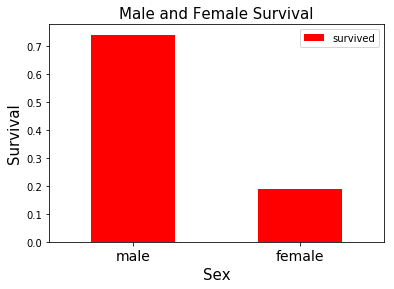

In [6]:
plt.figure(figsize=(60,40))
data.groupby("sex")[["survived"]].mean().plot.bar(rot=0,color="red")
plt.xticks(range(2),["male","female"], fontsize = 14)
plt.xlabel("Sex",fontsize=15)
plt.ylabel("Survival",fontsize=15)
plt.title("Male and Female Survival",fontsize=15)


__No se alcanza a leer los xticks y yticks, cambiarle el formato a la gráfica.__

El 74 % de las mujeres en el Titanic sobrevivieron y de los hombres sólo sobrevió el 18 %. Es más probable sobrevivir siendo mujer y más probable morir siendo hombre (maldito falocentrismo opresor).


### Según la clase en la que viajaba:

In [11]:
data.groupby("pclass")[["survived"]].mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


Text(0.5,1,'Survival in each Class')

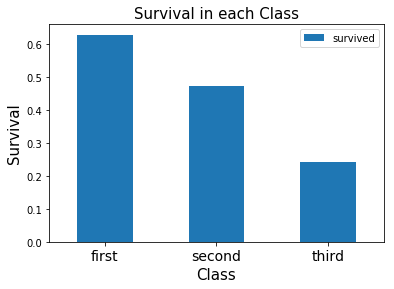

In [41]:
plt.figure(figsize=(60,40))
data.groupby("pclass")[["survived"]].mean().plot.bar(rot=0)
plt.xticks(range(3),["first", "second", "third"],fontsize=14)
plt.xlabel("Class",fontsize=15)
plt.ylabel("Survival",fontsize=15)
plt.title("Survival in each Class",fontsize=15)

El 62 % de las personas de primera clase sobrevivieron, el 47 % de las personas de segunda clase sobrevivieron y sólo el 24 % de las personas de tercera clase sobrevivieron. Es más probable sobrevivir en el Titanic siendo rico (primera clase) y es más probable morir siendo pobre (tercera clase).

# Cuántos Pasajeros Hubo por Clase y Cuántos se Salvaron en Cada Clase

Número de Pasajeros por Clase

In [12]:
data.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [13]:
data.groupby("pclass")[["survived"]].aggregate(lambda x: sum(x))

,survived
pclass,
1,136
2,87
3,119


Text(0.5,1,'Number of Survivors in each Class')

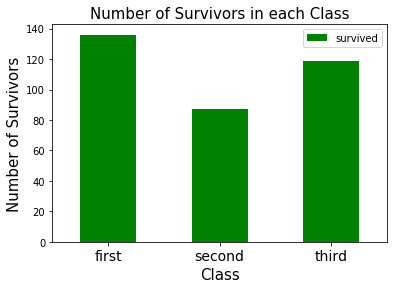

In [8]:
plt.figure(figsize=(60,40))
data.groupby("pclass")[["survived"]].aggregate(lambda x: sum(x)).plot.bar(rot=0, color = "green")
plt.xticks(range(3),["first", "second", "third"],fontsize=14)
plt.xlabel("Class",fontsize=15)
plt.ylabel("Number of Survivors",fontsize=15)
plt.title("Number of Survivors in each Class",fontsize=15)

De la gráfica observamos que se salvaron más personas de primera clase (136), seguido de las de tercera clase (119) y por último de segunda clase (87). Notemos que el número de personas que se salvaron en primera y en tercera clase es casi el mismo, pero había más del doble de pasajeros en tercera clase que en primera. En segunda clase es donde había menos pasajeros (184) y no tenían los "privilegios" de la primera por lo que es lógico que haya sido la clase en la que se salvó un número menor de personas.

_aqui pongo la gráfica que explica el análisis que hiciste._

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

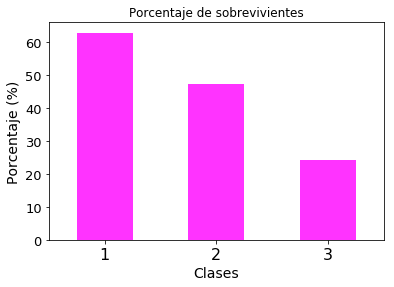

In [23]:
((data.groupby('pclass').survived.sum()/data.pclass.value_counts())*100).plot.bar(rot=0,
                    title='Porcentaje de sobrevivientes', color=['magenta'],alpha=0.8)
plt.ylabel('Porcentaje (%)',fontsize=14)
plt.xlabel('Clases',fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(fontsize=16)

Entonces la clase fregada son los pobres y los hombres.

*(2018-05-29)*

__Ahora necesito que hagas los siguientes ejercicios__

1. Genera un histograma del precio del ticket y de la edad (bins=50)
2. En que rangos de edad fue donde hubo más sobrevivientes?(genera tu los rangos y genera una columna con dichos rangos)
3. Dame el coeficiente de Correlación de las variables numéricas y grafica un Heatmap (te recomiendo la libreria seaborn)
4. Dime los primeros nombres que más se repiten.

# Tarea 2

_1. Genera un histograma del precio del ticket y de la edad (bins=50)_

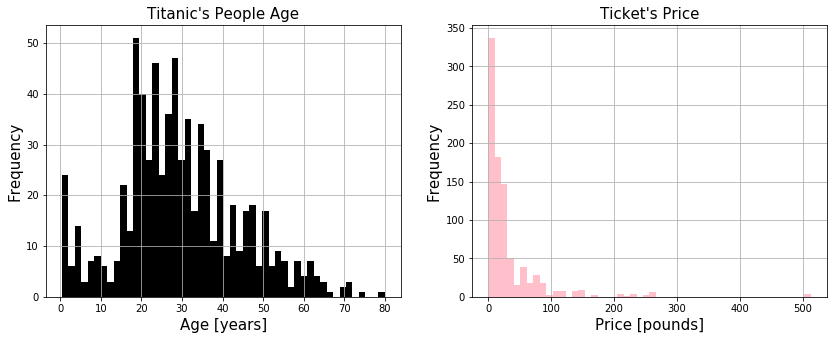

In [18]:
plt.figure(figsize=(14,5))

plt.subplot(121)
plt.title("Titanic's People Age",fontsize=15)
plt.xlabel("Age [years]",fontsize=15)
plt.ylabel("Frequency", fontsize=15)
data.age.hist(bins=50,color="black")

plt.subplot(122)
plt.title("Ticket's Price",fontsize=15)
plt.xlabel("Price [pounds]",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
data.fare.hist(bins=50,color="pink")


_2. ¿En qué rango de edad fue donde hubo más sobrevivientes?_

Primero generamos los rangos de edades:





In [23]:
data1 = data[data.age<=20]
data2 = data[data.age<=40]
data3 = data[data.age<=60]
data4 = data[data.age<=80]

ran1 = data1
ran2 = data2[data2.age>20]
ran3 = data3[data3.age>40]
ran4 = data4[data4.age>60]


In [71]:
inter1 = ran1.groupby("age")[["survived"]].aggregate(lambda x:sum(x))
survive1 = sum(inter1.iloc[:,0])

inter2 = ran2.groupby("age")[["survived"]].aggregate(lambda x:sum(x))
survive2 = sum(inter2.iloc[:,0])


inter3 = ran3.groupby("age")[["survived"]].aggregate(lambda x:sum(x))
survive3 = sum(inter3.iloc[:,0])

inter4 = ran4.groupby("age")[["survived"]].aggregate(lambda x:sum(x))
survive4 = sum(inter4.iloc[:,0])

s=[survive1,survive2,survive3,survive4]
I=['0-20','21,40','41-60','61-80']

In [75]:
number_survivors = pd.DataFrame({ 'Intervalos' : I, 'Sobrevivientes' : s})

In [77]:
number_survivors

,Intervalos,Sobrevivientes
0,0-20,82
1,"21,40",153
2,41-60,50
3,61-80,5
